In [2]:
## simulation

In [3]:
## Data Ingestion
import pandas as pd


data = pd.read_csv('deformation_simulation_data.csv')

In [4]:
## Data Preprocessing

data = data.dropna()  # Remove missing data rows

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Deformation', axis=1))

from sklearn.model_selection import train_test_split

X = data.drop('Deformation', axis=1)  # Features (load, material properties, etc.)
y = data['Deformation']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

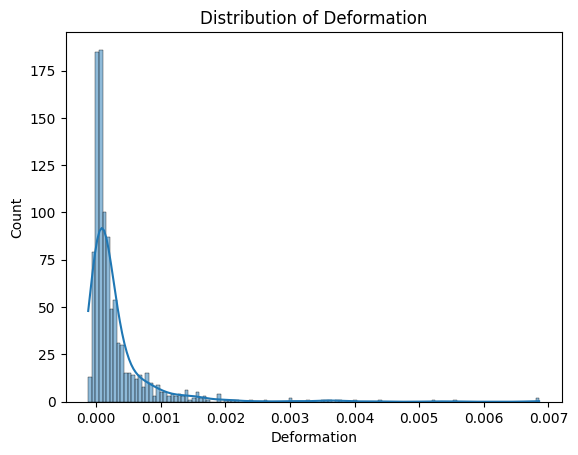

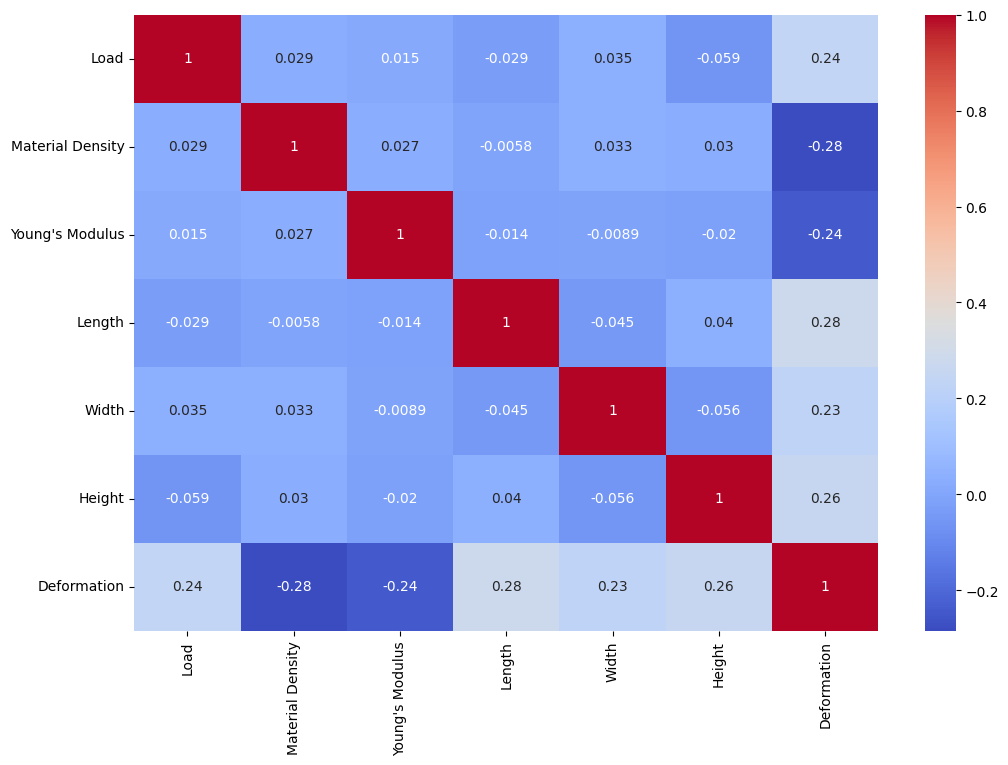

In [5]:
## EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Deformation
sns.histplot(y, kde=True)
plt.title("Distribution of Deformation")
plt.show()

# Correlation heatmap to see relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [6]:
## Model Selection and Training

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


In [7]:
## Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.00018742792820823322
Mean Squared Error: 1.9330241973266545e-07
R-squared: 0.5377455670007751


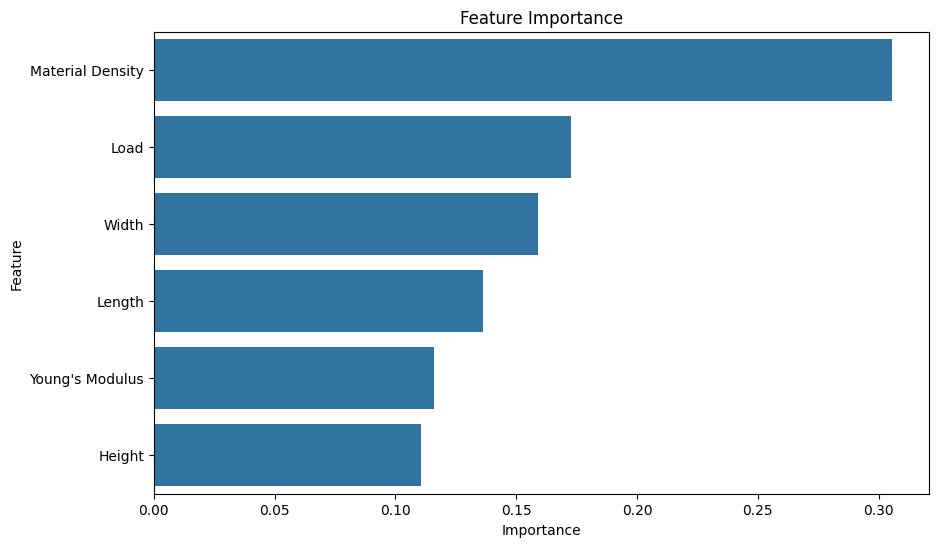

In [8]:
## Model Interpretation

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [9]:
## Model Deployment

import joblib

# Save the model
joblib.dump(model, 'deformation_prediction_model.pkl')

# Load the model
loaded_model = joblib.load('deformation_prediction_model.pkl')

# Predict on new data
new_data = X_test.iloc[0:1]  # Example new data
prediction = loaded_model.predict(new_data)
print("Predicted Deformation:", prediction)


Predicted Deformation: [0.00043304]
